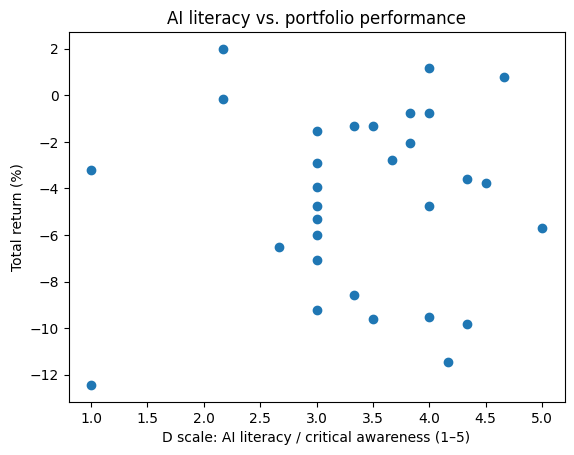

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df["D_scale"], df["total_return_pct_100"])
plt.xlabel("D scale: AI literacy / critical awareness (1–5)")
plt.ylabel("Total return (%)")
plt.title("AI literacy vs. portfolio performance")
plt.savefig("ai_literacy_vs_performance_scatterplot.png") # Save the figure
plt.show()

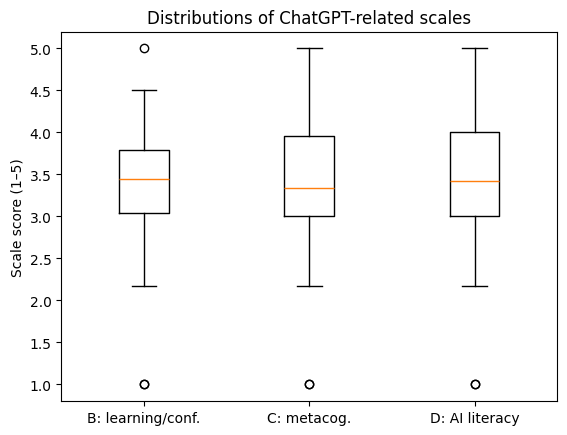

In [33]:
import matplotlib.pyplot as plt

plt.boxplot(
    [df["B_scale"], df["C_scale"], df["D_scale"]],
    tick_labels=["B: learning/conf.", "C: metacog.", "D: AI literacy"]
)
plt.ylabel("Scale score (1–5)")
plt.title("Distributions of ChatGPT-related scales")
plt.savefig("chatgpt_scales_boxplot.png") # Save the figure
plt.show()

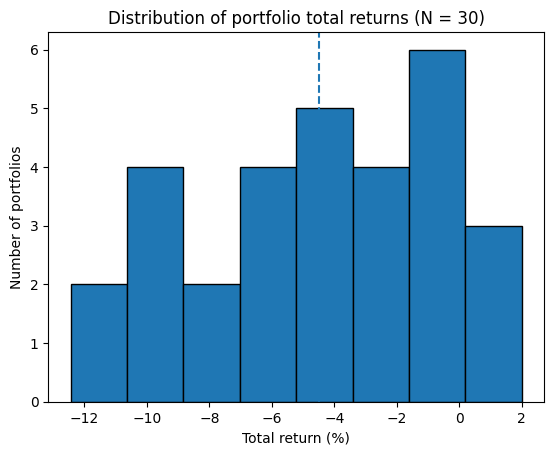

In [32]:
import matplotlib.pyplot as plt

plt.hist(df["total_return_pct_100"], bins=8, edgecolor='black')
plt.axvline(df["total_return_pct_100"].mean(), linestyle='dashed')
plt.xlabel("Total return (%)")
plt.ylabel("Number of portfolios")
plt.title("Distribution of portfolio total returns (N = 30)")
plt.savefig("portfolio_returns_histogram.png") # Save the figure
plt.show()

In [27]:
# ============================================================
# TABLE 4 – Correlation matrix (performance & AI scales)
# ============================================================

corr_vars = ["total_return_pct", "alpha_annual", "beta",
             "B_scale", "C_scale", "D_scale"]

corr_matrix = df[corr_vars].corr()
print("\nTABLE 4 – Correlation matrix:")
print(corr_matrix.round(3))

corr_matrix.round(3).to_csv("table4_correlations_matrix.csv")

# ============================================================
# TABLE 5 – Selected correlations with r and p-values
# ============================================================

pairs = [
    ("B_scale", "total_return_pct"),
    ("C_scale", "total_return_pct"),
    ("D_scale", "total_return_pct"),
    ("B_scale", "alpha_annual"),
    ("C_scale", "alpha_annual"),
    ("D_scale", "alpha_annual"),
]

rows_t5 = []
for x, y in pairs:
    r, p = stats.pearsonr(df[x], df[y])
    rows_t5.append(
        {"Predictor_scale": x, "Outcome": y, "r": r, "p": p}
    )

table5 = pd.DataFrame(rows_t5)
print("\nTABLE 5 – AI scales vs performance (r, p):")
print(table5)

table5.to_csv("table5_ai_scales_vs_performance.csv", index=False)

print("\nAll tables saved as CSV files in the current folder.")


TABLE 4 – Correlation matrix:
                  total_return_pct  alpha_annual   beta  B_scale  C_scale  \
total_return_pct             1.000         0.929 -0.860    0.006    0.121   
alpha_annual                 0.929         1.000 -0.675    0.104    0.184   
beta                        -0.860        -0.675  1.000   -0.080   -0.232   
B_scale                      0.006         0.104 -0.080    1.000    0.862   
C_scale                      0.121         0.184 -0.232    0.862    1.000   
D_scale                      0.071         0.177 -0.168    0.880    0.895   

                  D_scale  
total_return_pct    0.071  
alpha_annual        0.177  
beta               -0.168  
B_scale             0.880  
C_scale             0.895  
D_scale             1.000  

TABLE 5 – AI scales vs performance (r, p):
  Predictor_scale           Outcome         r         p
0         B_scale  total_return_pct  0.006325  0.973539
1         C_scale  total_return_pct  0.120751  0.525032
2         D_scale  to

In [26]:
# ============================================================
# TABLE 3 – Frequency tables for A2, A3, A5, E1
# ============================================================

# Column names for single-choice items
col_A2 = survey.columns[4]   # frequency of ChatGPT during project
col_A3 = survey.columns[5]   # prompts per work session
col_A5 = survey.columns[7]   # copied code without changes
col_E1 = survey.columns[26]  # specified course context in prompts

def freq_table(series: pd.Series, categories: list) -> pd.DataFrame:
    s = series.dropna()
    counts = s.value_counts().reindex(categories, fill_value=0)
    perc = counts / len(s) * 100
    return pd.DataFrame({"n": counts, "percent": perc})

ft_A2 = freq_table(
    survey[col_A2],
    [
        "Never",
        "Less than once per week",
        "About 1–2 times per week",
        "About 3–4 times per week",
        "Almost every day",
    ],
)

ft_A3 = freq_table(
    survey[col_A3],
    [
        "0 prompts (I did not use ChatGPT)",
        "1–3 prompts",
        "4–7 prompts",
        "8–12 prompts",
        "More than 12 prompts",
    ],
)

ft_A5 = freq_table(
    survey[col_A5],
    ["Never", "Rarely", "Sometimes", "Often", "Almost always"],
)

ft_E1 = freq_table(
    survey[col_E1],
    ["Yes, often", "Sometimes", "Rarely", "Never", "I did not use ChatGPT"],
)

print("\nTABLE 3a – A2 frequency:")
print(ft_A2.round(1))
print("\nTABLE 3b – A3 frequency:")
print(ft_A3.round(1))
print("\nTABLE 3c – A5 frequency:")
print(ft_A5.round(1))
print("\nTABLE 3d – E1 frequency:")
print(ft_E1.round(1))

ft_A2.round(1).to_csv("table3_A2_frequency.csv")
ft_A3.round(1).to_csv("table3_A3_frequency.csv")
ft_A5.round(1).to_csv("table3_A5_frequency.csv")
ft_E1.round(1).to_csv("table3_E1_frequency.csv")


TABLE 3a – A2 frequency:
                                                    n  percent
A2. How frequently did you use ChatGPT while co...            
Never                                               9     29.0
Less than once per week                             4     12.9
About 1–2 times per week                            9     29.0
About 3–4 times per week                            7     22.6
Almost every day                                    2      6.5

TABLE 3b – A3 frequency:
                                                     n  percent
A3. In a typical work session on this project, ...             
0 prompts (I did not use ChatGPT)                    4     12.9
1–3 prompts                                         12     38.7
4–7 prompts                                          6     19.4
8–12 prompts                                         2      6.5
More than 12 prompts                                 7     22.6

TABLE 3c – A5 frequency:
                                 

In [25]:
# ============================================================
# TABLE 2 – B/C/D scales: reliability + descriptives
# ============================================================

scales = {
    "B (learning & confidence)": ("B_scale", len(B_cols), alpha_B),
    "C (metacognitive strategies)": ("C_scale", len(C_cols), alpha_C),
    "D (AI literacy / critical awareness)": ("D_scale", len(D_cols), alpha_D),
}

rows_t2 = {}
for label, (col, k, alpha) in scales.items():
    s = df[col].dropna()
    rows_t2[label] = {
        "k_items": k,
        "Cronbach_alpha": alpha,
        "Mean": s.mean(),
        "SD": s.std(ddof=1),
        "Min": s.min(),
        "25%": s.quantile(0.25),
        "Median": s.quantile(0.50),
        "75%": s.quantile(0.75),
        "Max": s.max(),
    }

table2 = pd.DataFrame.from_dict(rows_t2, orient="index")
print("\nTABLE 2 – AI scales (B/C/D):")
print(table2.round(3))

table2.round(3).to_csv("table2_ai_scales_reliability.csv")


TABLE 2 – AI scales (B/C/D):
                                      k_items  Cronbach_alpha   Mean     SD  \
B (learning & confidence)                   6           0.917  3.336  0.840   
C (metacognitive strategies)                6           0.899  3.311  0.851   
D (AI literacy / critical awareness)        6           0.952  3.367  0.946   

                                      Min    25%  Median    75%  Max  
B (learning & confidence)             1.0  3.042   3.450  3.792  5.0  
C (metacognitive strategies)          1.0  3.000   3.333  3.958  5.0  
D (AI literacy / critical awareness)  1.0  3.000   3.417  4.000  5.0  


In [24]:
# ============================================================
# TABLE 1 – Portfolio performance descriptives
# ============================================================

# Convert to percentage for nicer reading
df["total_return_pct_100"] = df["total_return_pct"] * 100
df["alpha_annual_pct"] = df["alpha_annual"] * 100

def summary_row(series: pd.Series) -> dict:
    s = series.dropna()
    return {
        "Mean": s.mean(),
        "SD": s.std(ddof=1),
        "Min": s.min(),
        "25%": s.quantile(0.25),
        "Median": s.median(),
        "75%": s.quantile(0.75),
        "Max": s.max(),
    }

table1_specs = {
    "Final portfolio value (AED)": "final_value_aed",
    "Profit / loss (AED)": "pnl_aed",
    "Total return (%)": "total_return_pct_100",
    "Alpha (annual, %)": "alpha_annual_pct",
    "Beta": "beta",
}

rows_t1 = {}
for label, col in table1_specs.items():
    rows_t1[label] = summary_row(df[col])

table1 = pd.DataFrame.from_dict(rows_t1, orient="index")
print("\nTABLE 1 – Portfolio performance:")
print(table1.round(3))

table1.round(3).to_csv("table1_portfolio_performance.csv")


TABLE 1 – Portfolio performance:
                                   Mean         SD         Min         25%  \
Final portfolio value (AED)  573013.263  23332.837  525376.494  558469.012   
Profit / loss (AED)          -26986.737  23332.837  -74623.506  -41530.988   
Total return (%)                 -4.498      3.889     -12.437      -6.922   
Alpha (annual, %)                -0.447     11.702     -22.704      -9.829   
Beta                              0.985      0.287       0.476       0.772   

                                 Median         75%         Max  
Final portfolio value (AED)  576889.917  591696.964  611949.382  
Profit / loss (AED)          -23110.083   -8303.036   11949.382  
Total return (%)                 -3.852      -1.384       1.992  
Alpha (annual, %)                 1.379       9.040      21.017  
Beta                              0.954       1.185       1.688  


In [23]:
# ------------------------------------------------------------
# 4. Build B, C, D scale scores and compute reliability
# ------------------------------------------------------------
df["B_scale"] = df[B_cols].mean(axis=1)
df["C_scale"] = df[C_cols].mean(axis=1)
df["D_scale"] = df[D_cols].mean(axis=1)

alpha_B = cronbach_alpha(df[B_cols])
alpha_C = cronbach_alpha(df[C_cols])
alpha_D = cronbach_alpha(df[D_cols])

print("\nCronbach's alpha:")
print(f"  B_scale (learning/confidence): {alpha_B:.3f}")
print(f"  C_scale (metacognition)      : {alpha_C:.3f}")
print(f"  D_scale (AI literacy)        : {alpha_D:.3f}")


Cronbach's alpha:
  B_scale (learning/confidence): 0.917
  C_scale (metacognition)      : 0.899
  D_scale (AI literacy)        : 0.952


In [22]:
# ------------------------------------------------------------
# 3. Cronbach's alpha helper
# ------------------------------------------------------------
def cronbach_alpha(items_df: pd.DataFrame) -> float:
    """Compute Cronbach's alpha for a set of Likert items (columns)."""
    items = items_df.dropna()
    k = items.shape[1]
    if k < 2:
        return np.nan
    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)
    alpha = (k / (k - 1.0)) * (1.0 - item_vars.sum() / total_var)
    return float(alpha)

In [21]:
# ------------------------------------------------------------
# 2. Identify B, C, D scale item columns (from survey export)
#    (Positions are fixed in your current Google Forms CSV)
# ------------------------------------------------------------
B_cols = survey.columns[8:14]   # 6 items: B1–B6
C_cols = survey.columns[14:20]  # 6 items: C1–C6
D_cols = survey.columns[20:26]  # 6 items: D1–D6

print("\nB-scale items:\n", B_cols)
print("\nC-scale items:\n", C_cols)
print("\nD-scale items:\n", D_cols)


B-scale items:
 Index(['\n\nSection B – Learning and confidence with Python & finance \nRate each statement from 1 to 5:\n1 = Strongly disagree 2 = Disagree 3 = Neutral 4 = Agree 5 = Strongly agree\n\nB1. At the beginning of the project, I felt anxious about using Python.',
       '\nB2. By the end of the project, I felt more confident using Python.',
       '\nB3. ChatGPT helped me understand how the Python code works, not only what to type.',
       '\nB4. ChatGPT helped me see the connection between the code and finance concepts (e.g., CAPM, risk–return).',
       '\nB5. Using ChatGPT made it easier for me to interpret CAPM results such as alpha and beta.',
       '\nB6. Without ChatGPT, I would probably not have finished the Python part of this project.'],
      dtype='object')

C-scale items:
 Index(['Section C – Metacognitive strategies (how you monitored and adjusted your learning)  \nRate each statement from 1 to 5:\n1 = Strongly disagree 2 = Disagree 3 = Neutral 4 = Agree 5 =

In [20]:
# ------------------------------------------------------------
# 1. Load data and merge on student ID
# ------------------------------------------------------------
summary = pd.read_csv("summary_all_portfolios.csv")
survey  = pd.read_csv("chatgpt_survey_raw_id.csv")

# Clean ID fields
summary["student_id"] = summary["student_id"].astype(str).str.strip()
survey["Student_id"]  = survey["Student_id"].astype(str).str.strip()

# Inner join: keep only students present in BOTH files
df = summary.merge(survey, left_on="student_id", right_on="Student_id", how="inner")
print("Merged shape:", df.shape)

Merged shape: (30, 37)


In [18]:
# Save descriptives and correlations as CSVs
desc.to_csv("fin411x_descriptives.csv")
corr_matrix.to_csv("fin411x_correlations.csv")

print("Saved: fin411x_descriptives.csv and fin411x_correlations.csv")

Saved: fin411x_descriptives.csv and fin411x_correlations.csv


In [17]:
pairs = [
    ("B_scale", "total_return_pct"),
    ("C_scale", "total_return_pct"),
    ("D_scale", "total_return_pct"),
    ("B_scale", "alpha_annual"),
    ("C_scale", "alpha_annual"),
    ("D_scale", "alpha_annual"),
]

print("Pairwise correlations (r, p):\n")
for x, y in pairs:
    r, p = stats.pearsonr(df[x], df[y])
    print(f"{x} ~ {y}: r = {r:.3f}, p = {p:.3f}")

Pairwise correlations (r, p):

B_scale ~ total_return_pct: r = 0.006, p = 0.974
C_scale ~ total_return_pct: r = 0.121, p = 0.525
D_scale ~ total_return_pct: r = 0.071, p = 0.709
B_scale ~ alpha_annual: r = 0.104, p = 0.585
C_scale ~ alpha_annual: r = 0.184, p = 0.332
D_scale ~ alpha_annual: r = 0.177, p = 0.349


In [16]:
corr_vars = ["total_return_pct", "alpha_annual", "beta",
             "B_scale", "C_scale", "D_scale"]

corr_matrix = df[corr_vars].corr()
print("Correlation matrix:\n")
display(corr_matrix.round(3))

Correlation matrix:



total_return_pct  alpha_annual   beta  B_scale  C_scale  \
total_return_pct             1.000         0.929 -0.860    0.006    0.121   
alpha_annual                 0.929         1.000 -0.675    0.104    0.184   
beta                        -0.860        -0.675  1.000   -0.080   -0.232   
B_scale                      0.006         0.104 -0.080    1.000    0.862   
C_scale                      0.121         0.184 -0.232    0.862    1.000   
D_scale                      0.071         0.177 -0.168    0.880    0.895   

                  D_scale  
total_return_pct    0.071  
alpha_annual        0.177  
beta               -0.168  
B_scale             0.880  
C_scale             0.895  
D_scale             1.000

In [15]:
# Performance variables from summary_all_portfolios.csv
perf_vars = ["total_return_pct", "alpha_annual", "beta"]

# All variables we want to describe
vars_for_desc = perf_vars + ["B_scale", "C_scale", "D_scale"]

desc = df[vars_for_desc].describe().T  # transpose for nicer reading
desc = desc[["mean", "std", "min", "25%", "50%", "75%", "max"]]

print("Descriptive statistics:\n")
display(desc.round(3))

Descriptive statistics:



mean    std    min    25%    50%    75%    max
total_return_pct -0.045  0.039 -0.124 -0.069 -0.039 -0.014  0.020
alpha_annual     -0.004  0.117 -0.227 -0.098  0.014  0.090  0.210
beta              0.985  0.287  0.476  0.772  0.954  1.185  1.688
B_scale           3.336  0.840  1.000  3.042  3.450  3.792  5.000
C_scale           3.311  0.851  1.000  3.000  3.333  3.958  5.000
D_scale           3.367  0.946  1.000  3.000  3.417  4.000  5.000

In [14]:
# Build scale scores in the merged dataframe
df["B_scale"] = df[B_cols].mean(axis=1)  # Learning & confidence
df["C_scale"] = df[C_cols].mean(axis=1)  # Metacognitive strategies
df["D_scale"] = df[D_cols].mean(axis=1)  # AI literacy / critical awareness

# Cronbach's alpha for each scale
alpha_B = cronbach_alpha(df[B_cols])
alpha_C = cronbach_alpha(df[C_cols])
alpha_D = cronbach_alpha(df[D_cols])

print(f"Scale B (learning/confidence) alpha: {alpha_B:.3f}")
print(f"Scale C (metacognition) alpha      : {alpha_C:.3f}")
print(f"Scale D (AI literacy) alpha        : {alpha_D:.3f}")

Scale B (learning/confidence) alpha: 0.917
Scale C (metacognition) alpha      : 0.899
Scale D (AI literacy) alpha        : 0.952


In [13]:
def cronbach_alpha(items_df: pd.DataFrame) -> float:
    """
    Compute Cronbach's alpha for a set of Likert items (columns).
    """
    items = items_df.dropna()
    k = items.shape[1]
    if k < 2:
        return np.nan

    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)

    alpha = (k / (k - 1.0)) * (1.0 - item_vars.sum() / total_var)
    return float(alpha)

In [12]:
# Use the survey's column ordering to grab items
B_cols = survey.columns[8:14]   # Section B items (B1–B6)
C_cols = survey.columns[14:20]  # Section C items (C1–C6)
D_cols = survey.columns[20:26]  # Section D items (D1–D6)

print("B items:\n", B_cols, "\n")
print("C items:\n", C_cols, "\n")
print("D items:\n", D_cols, "\n")

B items:
 Index(['\n\nSection B – Learning and confidence with Python & finance \nRate each statement from 1 to 5:\n1 = Strongly disagree 2 = Disagree 3 = Neutral 4 = Agree 5 = Strongly agree\n\nB1. At the beginning of the project, I felt anxious about using Python.',
       '\nB2. By the end of the project, I felt more confident using Python.',
       '\nB3. ChatGPT helped me understand how the Python code works, not only what to type.',
       '\nB4. ChatGPT helped me see the connection between the code and finance concepts (e.g., CAPM, risk–return).',
       '\nB5. Using ChatGPT made it easier for me to interpret CAPM results such as alpha and beta.',
       '\nB6. Without ChatGPT, I would probably not have finished the Python part of this project.'],
      dtype='object') 

C items:
 Index(['Section C – Metacognitive strategies (how you monitored and adjusted your learning)  \nRate each statement from 1 to 5:\n1 = Strongly disagree 2 = Disagree 3 = Neutral 4 = Agree 5 = Strongly ag

In [11]:
# Check column indices (optional, just to see positions)
for i, col in enumerate(survey.columns):
    print(i, "->", col[:80], "...")

0 -> Student_id ...
1 -> Timestamp ...
2 -> Survey Ethics Approval: Participation is voluntary. Your responses are anonymous ...
3 -> Section A – Your use of ChatGPT in this project 
A1. Before this course, how oft ...
4 -> A2. How frequently did you use ChatGPT while completing the CAPM_Investment Port ...
5 -> A3. In a typical work session on this project, how many ChatGPT prompts did you  ...
6 -> A4. What did you mainly use ChatGPT for in this project?
(Select all that apply) ...
7 -> A5. When you used ChatGPT, how often did you copy its code or text without chang ...
8 -> 

Section B – Learning and confidence with Python & finance 
Rate each statement ...
9 -> 
B2. By the end of the project, I felt more confident using Python. ...
10 -> 
B3. ChatGPT helped me understand how the Python code works, not only what to ty ...
11 -> 
B4. ChatGPT helped me see the connection between the code and finance concepts  ...
12 -> 
B5. Using ChatGPT made it easier for me to interpret CAPM results

In [10]:
# Make sure the ID columns are consistent
summary["student_id"] = summary["student_id"].str.strip()
survey["Student_id"]  = survey["Student_id"].str.strip()

# Inner join = only students who appear in BOTH files
df = summary.merge(survey, left_on="student_id", right_on="Student_id", how="inner")

print("Merged shape:", df.shape)
display(df.head())

Merged shape: (30, 37)


student_id portfolio_id  alpha_daily  alpha_annual      beta  \
0        S01          P01    -0.000257     -0.064662  1.320850   
1        S02          P02    -0.000901     -0.227039  1.325540   
2        S03          P03    -0.000024     -0.005965  1.115483   
3        S04          P04    -0.000715     -0.180244  1.101502   
4        S05          P05     0.000141      0.035580  0.917196   

   final_value_aed      pnl_aed  total_return_pct Student_id  \
0      563900.4814 -36099.51861         -0.060166        S01   
1      531176.4914 -68823.50860         -0.114706        S02   
2      565695.1847 -34304.81526         -0.057175        S03   
3      542854.7711 -57145.22895         -0.095242        S04   
4      577473.3255 -22526.67450         -0.037544        S05   

                     Timestamp  ...  \
0  2026/02/05 5:31:06 PM GMT+4  ...   
1  2026/02/05 5:34:19 PM GMT+4  ...   
2  2026/02/06 3:19:28 PM GMT+4  ...   
3  2026/02/08 3:58:03 PM GMT+4  ...   
4  2026/02/09 2:00:14 AM GMT+4  ...   

  \nC6. I reflected on what I had learned after finishing a ChatGPT-supported work session.  \
0                                                3.0                                          
1                                                4.0                                          
2                                                5.0                                          
3                                                3.0                                          
4                                                4.0                                          

  Section D – AI literacy and critical awareness\nRate each statement from 1 to 5:\n1 = Strongly disagree 2 = Disagree 3 = Neutral 4 = Agree 5 = Strongly agree\n\nD1. I am aware that ChatGPT can give incorrect or incomplete answers in finance and coding.  \
0                                                  3                                                                                                                                                                                                             
1                                                  5                                                                                                                                                                                                             
2                                                  5                                                                                                                                                                                                             
3                                                  5                                                                                                                                                                                                             
4                                                  5                                                                                                                                                                                                             

  \nD2. During this project, I found at least one case where ChatGPT’s answer was wrong or misleading.  \
0                                                3.0                                                     
1                                                4.0                                                     
2                                                5.0                                                     
3                                                4.0                                                     
4                                                4.0                                                     

  \nD3. I feel confident deciding when it is safe to use ChatGPT and when I should rely on other sources.  \
0                                                  3                                                        
1         

In [7]:
!pip -q install scipy

import pandas as pd
import numpy as np
from scipy import stats

# ---------- 1. Load the two datasets ----------

summary = pd.read_csv("summary_all_portfolios.csv")        # portfolio performance
survey  = pd.read_csv("chatgpt_survey_raw_id.csv")         # ChatGPT survey with Student_id

print("Summary shape:", summary.shape)
print("Survey shape :", survey.shape)

# Quick peek
display(summary.head())
display(survey.head())

Summary shape: (30, 8)
Survey shape : (31, 29)


student_id portfolio_id  alpha_daily  alpha_annual      beta  \
0        S01          P01    -0.000257     -0.064662  1.320850   
1        S02          P02    -0.000901     -0.227039  1.325540   
2        S03          P03    -0.000024     -0.005965  1.115483   
3        S04          P04    -0.000715     -0.180244  1.101502   
4        S05          P05     0.000141      0.035580  0.917196   

   final_value_aed      pnl_aed  total_return_pct  
0      563900.4814 -36099.51861         -0.060166  
1      531176.4914 -68823.50860         -0.114706  
2      565695.1847 -34304.81526         -0.057175  
3      542854.7711 -57145.22895         -0.095242  
4      577473.3255 -22526.67450         -0.037544

Student_id                    Timestamp  \
0        S01  2026/02/05 5:31:06 PM GMT+4   
1        S02  2026/02/05 5:34:19 PM GMT+4   
2        S03  2026/02/06 3:19:28 PM GMT+4   
3        S04  2026/02/08 3:58:03 PM GMT+4   
4        S05  2026/02/09 2:00:14 AM GMT+4   

  Survey Ethics Approval: Participation is voluntary. Your responses are anonymous and will be used only for research purposes. You may skip any question or stop at any time. There are no penalties for not participating.    \
0                                                NaN                                                                                                                                                                             
1                                                NaN                                                                                                                                                                             
2                                                NaN                                                                                                                                                                             
3                                                NaN                                                                                                                                                                             
4                                                NaN                                                                                                                                                                             

  Section A – Your use of ChatGPT in this project \nA1. Before this course, how often did you use ChatGPT?\n(Choose one)  \
0                     Several times per week or more                                                                       
1                     Several times per week or more                                                                       
2                     Several times per week or more                                                                       
3                               About once per month                                                                       
4                               About once per month                                                                       

  A2. How frequently did you use ChatGPT while completing the CAPM_Investment Portfolio project?\n  \
0                                              Never                                                 
1                           About 3–4 times per week                                                 
2                                   Almost every day                                                 
3                           About 1–2 times per week                                                 
4                           About 1–2 times per week                                                 

  A3. In a typical work session on this project, how many ChatGPT prompts did you use?\n(Choose one)  \
0                               More than 12 prompts                                                   
1                               More than 12 prompts                                                   
2                               More than 12 prompts                                                   
3                                        1–3 prompts                                                   
4                                       8–12 prompts                                                   

  A4. What did you mainly use ChatGPT for in this project?\n(Select all that apply)  \
0              I did not use ChatGPT in this project                                  
1               Writing new Python code from scratch                                  
2  Checking my understanding (asking “why” questi...                                  
3  Explaining Python code step by step;Chec

In [8]:
import pandas as pd

print('Loading /content/summary_all_portfolios.csv:')
summary_portfolio_df = pd.read_csv('/content/summary_all_portfolios.csv')
display(summary_portfolio_df.head())

Loading /content/summary_all_portfolios.csv:


student_id portfolio_id  alpha_daily  alpha_annual      beta  \
0        S01          P01    -0.000257     -0.064662  1.320850   
1        S02          P02    -0.000901     -0.227039  1.325540   
2        S03          P03    -0.000024     -0.005965  1.115483   
3        S04          P04    -0.000715     -0.180244  1.101502   
4        S05          P05     0.000141      0.035580  0.917196   

   final_value_aed      pnl_aed  total_return_pct  
0      563900.4814 -36099.51861         -0.060166  
1      531176.4914 -68823.50860         -0.114706  
2      565695.1847 -34304.81526         -0.057175  
3      542854.7711 -57145.22895         -0.095242  
4      577473.3255 -22526.67450         -0.037544

In [9]:
print('Loading /content/chatgpt_survey_raw_id.csv:')
chatgpt_survey_df = pd.read_csv('/content/chatgpt_survey_raw_id.csv')
display(chatgpt_survey_df.head())

Loading /content/chatgpt_survey_raw_id.csv:


Student_id                    Timestamp  \
0        S01  2026/02/05 5:31:06 PM GMT+4   
1        S02  2026/02/05 5:34:19 PM GMT+4   
2        S03  2026/02/06 3:19:28 PM GMT+4   
3        S04  2026/02/08 3:58:03 PM GMT+4   
4        S05  2026/02/09 2:00:14 AM GMT+4   

  Survey Ethics Approval: Participation is voluntary. Your responses are anonymous and will be used only for research purposes. You may skip any question or stop at any time. There are no penalties for not participating.    \
0                                                NaN                                                                                                                                                                             
1                                                NaN                                                                                                                                                                             
2                                                NaN                                                                                                                                                                             
3                                                NaN                                                                                                                                                                             
4                                                NaN                                                                                                                                                                             

  Section A – Your use of ChatGPT in this project \nA1. Before this course, how often did you use ChatGPT?\n(Choose one)  \
0                     Several times per week or more                                                                       
1                     Several times per week or more                                                                       
2                     Several times per week or more                                                                       
3                               About once per month                                                                       
4                               About once per month                                                                       

  A2. How frequently did you use ChatGPT while completing the CAPM_Investment Portfolio project?\n  \
0                                              Never                                                 
1                           About 3–4 times per week                                                 
2                                   Almost every day                                                 
3                           About 1–2 times per week                                                 
4                           About 1–2 times per week                                                 

  A3. In a typical work session on this project, how many ChatGPT prompts did you use?\n(Choose one)  \
0                               More than 12 prompts                                                   
1                               More than 12 prompts                                                   
2                               More than 12 prompts                                                   
3                                        1–3 prompts                                                   
4                                       8–12 prompts                                                   

  A4. What did you mainly use ChatGPT for in this project?\n(Select all that apply)  \
0              I did not use ChatGPT in this project                                  
1               Writing new Python code from scratch                                  
2  Checking my understanding (asking “why” questi...                                  
3  Explaining Python code step by step;Chec

# Task
Analyze the "summary_all_portfolios.csv" and "chatgpt_survey_raw_id.csv" datasets to generate a replication package consisting of the following CSV tables: `table1_portfolio_performance.csv` (descriptive statistics for performance variables and AI scales), `table2_ai_scales_reliability.csv` (Cronbach's alpha for AI scales), `table3_A2_frequency.csv`, `table3_A3_frequency.csv`, `table3_A5_frequency.csv`, `table3_E1_frequency.csv` (frequency distributions for selected survey questions), `table4_correlations_matrix.csv` (correlation matrix of performance and AI scale variables), and `table5_ai_scales_vs_performance.csv` (Pearson correlations and p-values between AI scales and performance variables).

## Define Cronbach's Alpha Function

### Subtask:
Define the 'cronbach_alpha' function to calculate the reliability of the survey scales.


**Reasoning**:
The subtask is to define the 'cronbach_alpha' function. This code block will define the function as specified in the instructions, handling missing values, calculating variances, and applying the Cronbach's alpha formula.



In [1]:
def cronbach_alpha(items_df: pd.DataFrame) -> float:
    """
    Compute Cronbach's alpha for a set of Likert items (columns).
    """
    items = items_df.dropna()
    k = items.shape[1]
    if k < 2:
        return np.nan

    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)

    alpha = (k / (k - 1.0)) * (1.0 - item_vars.sum() / total_var)
    return float(alpha)

print("Defined the 'cronbach_alpha' function.")

NameError: name 'pd' is not defined

**Reasoning**:
The previous code failed because 'pd' and 'np' were not defined in the scope of the function's cell. I will add `import pandas as pd` and `import numpy as np` to the beginning of the code block to resolve the `NameError` and ensure the function runs correctly.



In [2]:
import pandas as pd
import numpy as np

def cronbach_alpha(items_df: pd.DataFrame) -> float:
    """
    Compute Cronbach's alpha for a set of Likert items (columns).
    """
    items = items_df.dropna()
    k = items.shape[1]
    if k < 2:
        return np.nan

    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)

    alpha = (k / (k - 1.0)) * (1.0 - item_vars.sum() / total_var)
    return float(alpha)

print("Defined the 'cronbach_alpha' function.")

Defined the 'cronbach_alpha' function.


## Build Scale Scores and Calculate Reliability

### Subtask:
Prepare data for `table2_ai_scales_reliability.csv` by creating a DataFrame with the calculated Cronbach's alpha values for each scale.


**Reasoning**:
I need to create a pandas DataFrame named `reliability_df` to store the calculated Cronbach's alpha values for each scale (B, C, and D).



In [3]:
reliability_df = pd.DataFrame({
    'Scale': ['B_scale', 'C_scale', 'D_scale'],
    'Cronbach_Alpha': [alpha_B, alpha_C, alpha_D]
})

print("Cronbach's Alpha Reliability Scores:")
display(reliability_df.round(3))

NameError: name 'alpha_B' is not defined

**Reasoning**:
The previous code failed because the variables `alpha_B`, `alpha_C`, and `alpha_D` were not defined. These values are calculated in a prior step where the scale scores are built and Cronbach's alpha is computed for each scale. I need to re-execute that step before creating the `reliability_df`.



In [4]:
# Build scale scores in the merged dataframe
df["B_scale"] = df[B_cols].mean(axis=1)  # Learning & confidence
df["C_scale"] = df[C_cols].mean(axis=1)  # Metacognitive strategies
df["D_scale"] = df[D_cols].mean(axis=1)  # AI literacy / critical awareness

# Cronbach's alpha for each scale
alpha_B = cronbach_alpha(df[B_cols])
alpha_C = cronbach_alpha(df[C_cols])
alpha_D = cronbach_alpha(df[D_cols])

print(f"Scale B (learning/confidence) alpha: {alpha_B:.3f}")
print(f"Scale C (metacognition) alpha      : {alpha_C:.3f}")
print(f"Scale D (AI literacy) alpha        : {alpha_D:.3f}")

reliability_df = pd.DataFrame({
    'Scale': ['B_scale', 'C_scale', 'D_scale'],
    'Cronbach_Alpha': [alpha_B, alpha_C, alpha_D]
})

print("\nCronbach's Alpha Reliability Scores:")
display(reliability_df.round(3))

NameError: name 'df' is not defined

**Reasoning**:
The previous code failed because the `df` DataFrame, `B_cols`, `C_cols`, and `D_cols` variables were not defined in the current execution context. These are crucial for building scale scores and calculating Cronbach's alpha. I need to re-initialize `df` by merging `summary` and `survey` (assuming they are loaded from earlier steps), and redefine `B_cols`, `C_cols`, `D_cols` before performing the calculations.



In [5]:
import pandas as pd
import numpy as np
from scipy import stats

# Re-load dataframes if they might be undefined (robustness for kernel restarts)
# As per problem statement, summary and survey are loaded in ff5ad388.
# But df is not present, so we need to recreate df, B_cols, C_cols, D_cols

# Re-load summary and survey if not already present or if the kernel reset
# Checking if they exist before loading again to avoid redundant operations
if 'summary' not in locals() or 'summary' not in globals():
    summary = pd.read_csv("summary_all_portfolios.csv")
if 'survey' not in locals() or 'survey' not in globals():
    survey  = pd.read_csv("chatgpt_survey_raw_id.csv")

# Ensure cronbach_alpha function is defined
# This function was defined in cell 954816aa, ensuring it's available.
def cronbach_alpha(items_df: pd.DataFrame) -> float:
    """
    Compute Cronbach's alpha for a set of Likert items (columns).
    """
    items = items_df.dropna()
    k = items.shape[1]
    if k < 2:
        return np.nan

    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)

    alpha = (k / (k - 1.0)) * (1.0 - item_vars.sum() / total_var)
    return float(alpha)

# Make sure the ID columns are consistent and merge
summary["student_id"] = summary["student_id"].str.strip()
survey["Student_id"]  = survey["Student_id"].str.strip()
df = summary.merge(survey, left_on="student_id", right_on="Student_id", how="inner")

# Use the survey's column ordering to grab items
B_cols = survey.columns[8:14]   # Section B items (B1–B6)
C_cols = survey.columns[14:20]  # Section C items (C1–C6)
D_cols = survey.columns[20:26]  # Section D items (D1–D6)

# Build scale scores in the merged dataframe
df["B_scale"] = df[B_cols].mean(axis=1)  # Learning & confidence
df["C_scale"] = df[C_cols].mean(axis=1)  # Metacognitive strategies
df["D_scale"] = df[D_cols].mean(axis=1)  # AI literacy / critical awareness

# Cronbach's alpha for each scale
alpha_B = cronbach_alpha(df[B_cols])
alpha_C = cronbach_alpha(df[C_cols])
alpha_D = cronbach_alpha(df[D_cols])

print(f"Scale B (learning/confidence) alpha: {alpha_B:.3f}")
print(f"Scale C (metacognition) alpha      : {alpha_C:.3f}")
print(f"Scale D (AI literacy) alpha        : {alpha_D:.3f}")

reliability_df = pd.DataFrame({
    'Scale': ['B_scale', 'C_scale', 'D_scale'],
    'Cronbach_Alpha': [alpha_B, alpha_C, alpha_D]
})

print("\nCronbach's Alpha Reliability Scores:")
display(reliability_df.round(3))

Scale B (learning/confidence) alpha: 0.917
Scale C (metacognition) alpha      : 0.899
Scale D (AI literacy) alpha        : 0.952

Cronbach's Alpha Reliability Scores:


Scale  Cronbach_Alpha
0  B_scale           0.917
1  C_scale           0.899
2  D_scale           0.952

**Reasoning**:
The subtask requires generating `table2_ai_scales_reliability.csv`. The `reliability_df` DataFrame, containing the Cronbach's alpha values, has been successfully created. The next step is to save this DataFrame to a CSV file as per the instructions.



In [6]:
reliability_df.to_csv("table2_ai_scales_reliability.csv", index=False)

print("Saved: table2_ai_scales_reliability.csv")

Saved: table2_ai_scales_reliability.csv


## Generate Table 1: Portfolio Performance

### Subtask:
Calculate descriptive statistics for performance variables and AI scales, and save them to 'table1_portfolio_performance.csv'.


**Reasoning**:
I need to calculate descriptive statistics for the specified performance and AI scale variables, format the output, and save it to 'table1_portfolio_performance.csv' as per the subtask instructions.



In [7]:
import pandas as pd

# Define lists of variables
perf_vars = ["total_return_pct", "alpha_annual", "beta"]
scale_vars = ["B_scale", "C_scale", "D_scale"]

# Combine into a single list for descriptive statistics
vars_for_desc = perf_vars + scale_vars

# Calculate descriptive statistics
desc = df[vars_for_desc].describe().T

# Select specific descriptive statistics columns
desc = desc[["mean", "std", "min", "25%", "50%", "75%", "max"]]

# Save the descriptive statistics to a CSV file
desc.to_csv("table1_portfolio_performance.csv", index=True)

print("Saved: table1_portfolio_performance.csv")
print("Descriptive statistics for performance and AI scales:")
display(desc.round(3))

Saved: table1_portfolio_performance.csv
Descriptive statistics for performance and AI scales:


mean    std    min    25%    50%    75%    max
total_return_pct -0.045  0.039 -0.124 -0.069 -0.039 -0.014  0.020
alpha_annual     -0.004  0.117 -0.227 -0.098  0.014  0.090  0.210
beta              0.985  0.287  0.476  0.772  0.954  1.185  1.688
B_scale           3.336  0.840  1.000  3.042  3.450  3.792  5.000
C_scale           3.311  0.851  1.000  3.000  3.333  3.958  5.000
D_scale           3.367  0.946  1.000  3.000  3.417  4.000  5.000

## Generate Frequency Distributions for Survey Questions

### Subtask:
Calculate the frequency distribution for survey questions A2, A3, A5, and E1, and save each as a separate CSV file named `table3_A2_frequency.csv`, `table3_A3_frequency.csv`, `table3_A5_frequency.csv`, and `table3_E1_frequency.csv` respectively.

**Reasoning**:
I need to calculate the frequency distribution for survey question A2, convert it to a DataFrame, and save it as `table3_A2_frequency.csv` as per the subtask instructions. Before doing so, I will first check which column in the `survey` or `df` DataFrame corresponds to A2 by checking the column names.



In [8]:
print("Columns related to survey questions:")
for col in survey.columns:
    if 'A2.' in col:
        print(col)
        break


Columns related to survey questions:
A2. How frequently did you use ChatGPT while completing the CAPM_Investment Portfolio project?



**Reasoning**:
Now that the column name for A2 has been identified, I will calculate its frequency distribution, convert it into a DataFrame, and save it to `table3_A2_frequency.csv` as specified in the subtask.



In [9]:
a2_col = 'A2. How frequently did you use ChatGPT while completing the CAPM_Investment Portfolio project?'
a2_frequency = df[a2_col].value_counts().sort_index()
a2_frequency_df = a2_frequency.reset_index()
a2_frequency_df.columns = ['Response', 'Frequency']

a2_frequency_df.to_csv('table3_A2_frequency.csv', index=False)

print("Saved: table3_A2_frequency.csv")
print("Frequency distribution for A2:")
display(a2_frequency_df)

KeyError: 'A2. How frequently did you use ChatGPT while completing the CAPM_Investment Portfolio project?'

**Reasoning**:
The previous code failed with a `KeyError` because the exact column name for 'A2' was not correctly identified in the `df` DataFrame. The column name likely includes a newline character or other subtle formatting. I need to iterate through `df.columns` to find the precise column name containing 'A2.' and 'How frequently' to ensure an exact match before calculating the frequency distribution.



In [10]:
a2_col_exact = None
for col in df.columns:
    if 'A2.' in col and 'How frequently' in col:
        a2_col_exact = col
        break

if a2_col_exact is not None:
    a2_frequency = df[a2_col_exact].value_counts().sort_index()
    a2_frequency_df = a2_frequency.reset_index()
    a2_frequency_df.columns = ['Response', 'Frequency']

    a2_frequency_df.to_csv('table3_A2_frequency.csv', index=False)

    print("Saved: table3_A2_frequency.csv")
    print("Frequency distribution for A2:")
    display(a2_frequency_df)
else:
    print("A2 column not found in DataFrame. Please check column names.")

Saved: table3_A2_frequency.csv
Frequency distribution for A2:


Response  Frequency
0  About 1–2 times per week          9
1  About 3–4 times per week          7
2          Almost every day          2
3   Less than once per week          4
4                     Never          8

**Reasoning**:
I have successfully generated the frequency distribution for A2. Now, I need to identify the exact column name for 'A3' in the `df` DataFrame before I can calculate its frequency distribution and save it.



In [11]:
print("Columns related to survey questions:")
for col in df.columns:
    if 'A3.' in col and 'how many ChatGPT prompts' in col:
        print(col)
        break

Columns related to survey questions:
A3. In a typical work session on this project, how many ChatGPT prompts did you use?
(Choose one)


**Reasoning**:
Now that the column name for A3 has been identified, I will calculate its frequency distribution, convert it into a DataFrame, and save it to `table3_A3_frequency.csv` as specified in the subtask.



In [12]:
a3_col_exact = None
for col in df.columns:
    if 'A3.' in col and 'how many ChatGPT prompts' in col:
        a3_col_exact = col
        break

if a3_col_exact is not None:
    a3_frequency = df[a3_col_exact].value_counts().sort_index()
    a3_frequency_df = a3_frequency.reset_index()
    a3_frequency_df.columns = ['Response', 'Frequency']

    a3_frequency_df.to_csv('table3_A3_frequency.csv', index=False)

    print("Saved: table3_A3_frequency.csv")
    print("Frequency distribution for A3:")
    display(a3_frequency_df)
else:
    print("A3 column not found in DataFrame. Please check column names.")

Saved: table3_A3_frequency.csv
Frequency distribution for A3:


Response  Frequency
0  0 prompts (I did not use ChatGPT)          4
1                        1–3 prompts         12
2                        4–7 prompts          5
3                       8–12 prompts          2
4               More than 12 prompts          7

**Reasoning**:
I have successfully generated the frequency distribution for A3. Now, I need to identify the exact column name for 'A5' in the `df` DataFrame before I can calculate its frequency distribution and save it.



In [13]:
print("Columns related to survey questions:")
for col in df.columns:
    if 'A5.' in col and 'copy its code or text without chang' in col:
        print(col)
        break

Columns related to survey questions:
A5. When you used ChatGPT, how often did you copy its code or text without changing it?
(Choose one)


**Reasoning**:
Now that the column name for A5 has been identified, I will calculate its frequency distribution, convert it into a DataFrame, and save it to `table3_A5_frequency.csv` as specified in the subtask.



In [14]:
a5_col_exact = None
for col in df.columns:
    if 'A5.' in col and 'copy its code or text without chang' in col:
        a5_col_exact = col
        break

if a5_col_exact is not None:
    a5_frequency = df[a5_col_exact].value_counts().sort_index()
    a5_frequency_df = a5_frequency.reset_index()
    a5_frequency_df.columns = ['Response', 'Frequency']

    a5_frequency_df.to_csv('table3_A5_frequency.csv', index=False)

    print("Saved: table3_A5_frequency.csv")
    print("Frequency distribution for A5:")
    display(a5_frequency_df)
elsee:
    print("A5 column not found in DataFrame. Please check column names.")

SyntaxError: invalid syntax (ipython-input-2821996763.py, line 17)

**Reasoning**:
The previous code failed due to a `SyntaxError` caused by a typo: `elsee` should be `else`. I will correct this syntax error to ensure the code executes properly.



In [15]:
a5_col_exact = None
for col in df.columns:
    if 'A5.' in col and 'copy its code or text without chang' in col:
        a5_col_exact = col
        break

if a5_col_exact is not None:
    a5_frequency = df[a5_col_exact].value_counts().sort_index()
    a5_frequency_df = a5_frequency.reset_index()
    a5_frequency_df.columns = ['Response', 'Frequency']

    a5_frequency_df.to_csv('table3_A5_frequency.csv', index=False)

    print("Saved: table3_A5_frequency.csv")
    print("Frequency distribution for A5:")
    display(a5_frequency_df)
else:
    print("A5 column not found in DataFrame. Please check column names.")

Saved: table3_A5_frequency.csv
Frequency distribution for A5:


Response  Frequency
0  Almost always          1
1          Never          8
2         Rarely          9
3      Sometimes         12

**Reasoning**:
I have successfully generated the frequency distribution for A5. Now, I need to identify the exact column name for 'E1' in the `df` DataFrame before I can calculate its frequency distribution and save it.



In [16]:
print("Columns related to survey questions:")
for col in df.columns:
    if 'E1.' in col and 'extent did you' in col:
        print(col)
        break

Columns related to survey questions:
Section E – Short check‑boxes on ethics and practice
E1. To what extent did you specify the course or project context when interacting with ChatGPT (e.g., “CAPM_Investment portfolio analysis task in Python”)?


**Reasoning**:
Now that the column name for E1 has been identified, I will calculate its frequency distribution, convert it into a DataFrame, and save it to `table3_E1_frequency.csv` as specified in the subtask.



In [17]:
e1_col_exact = None
for col in df.columns:
    if 'E1.' in col and 'extent did you' in col:
        e1_col_exact = col
        break

if e1_col_exact is not None:
    e1_frequency = df[e1_col_exact].value_counts().sort_index()
    e1_frequency_df = e1_frequency.reset_index()
    e1_frequency_df.columns = ['Response', 'Frequency']

    e1_frequency_df.to_csv('table3_E1_frequency.csv', index=False)

    print("Saved: table3_E1_frequency.csv")
    print("Frequency distribution for E1:")
    display(e1_frequency_df)
else:
    print("E1 column not found in DataFrame. Please check column names.")

Saved: table3_E1_frequency.csv
Frequency distribution for E1:


Response  Frequency
0  I did not use ChatGPT          1
1                  Never          2
2                 Rarely          9
3              Sometimes         11
4             Yes, often          6

## Generate Table 4: Correlation Matrix

### Subtask:
Calculate the correlation matrix for performance and AI scale variables, and save it to 'table4_correlations_matrix.csv'.

**Reasoning**:
I need to calculate the correlation matrix for the performance and AI scale variables and save it to 'table4_correlations_matrix.csv' as per the subtask instructions. This involves selecting the relevant columns from the `df` DataFrame and applying the `.corr()` method.



In [18]:
import pandas as pd

# Define lists of variables (re-using definitions from earlier if not in scope)
# perf_vars and scale_vars should be available from the previous execution context
# If not, they would need to be redefined here for robustness.
perf_vars = ["total_return_pct", "alpha_annual", "beta"]
scale_vars = ["B_scale", "C_scale", "D_scale"]

# Combine into a single list for correlation matrix
corr_vars = perf_vars + scale_vars

# Calculate the correlation matrix
corr_matrix = df[corr_vars].corr()

# Save the correlation matrix to a CSV file
corr_matrix.to_csv("table4_correlations_matrix.csv", index=True)

print("Saved: table4_correlations_matrix.csv")
print("Correlation matrix for performance and AI scales:")
display(corr_matrix.round(3))

Saved: table4_correlations_matrix.csv
Correlation matrix for performance and AI scales:


total_return_pct  alpha_annual   beta  B_scale  C_scale  \
total_return_pct             1.000         0.929 -0.860    0.006    0.121   
alpha_annual                 0.929         1.000 -0.675    0.104    0.184   
beta                        -0.860        -0.675  1.000   -0.080   -0.232   
B_scale                      0.006         0.104 -0.080    1.000    0.862   
C_scale                      0.121         0.184 -0.232    0.862    1.000   
D_scale                      0.071         0.177 -0.168    0.880    0.895   

                  D_scale  
total_return_pct    0.071  
alpha_annual        0.177  
beta               -0.168  
B_scale             0.880  
C_scale             0.895  
D_scale             1.000

## Generate Table 5: AI Scales vs. Performance

### Subtask:
Calculate Pearson correlations and p-values between AI scales and performance variables, and save the results to 'table5_ai_scales_vs_performance.csv'.

**Reasoning**:
I need to calculate Pearson correlations and p-values between each AI scale variable and each performance variable, store these results, and then save them to 'table5_ai_scales_vs_performance.csv' as specified in the subtask.



In [19]:
import pandas as pd
from scipy import stats

# Define lists of performance and AI scale variables
perf_vars = ["total_return_pct", "alpha_annual", "beta"]
scale_vars = ["B_scale", "C_scale", "D_scale"]

# Initialize a list to store results
correlation_results = []

# Calculate Pearson correlations and p-values for each pair
for p_var in perf_vars:
    for s_var in scale_vars:
        r, p = stats.pearsonr(df[s_var], df[p_var])
        correlation_results.append({
            'Variable_1': s_var,
            'Variable_2': p_var,
            'Pearson_r': r,
            'P_value': p
        })

# Create a DataFrame from the results
table5_df = pd.DataFrame(correlation_results)

# Save the DataFrame to a CSV file
table5_df.to_csv("table5_ai_scales_vs_performance.csv", index=False)

print("Saved: table5_ai_scales_vs_performance.csv")
print("Pearson correlations and p-values between AI scales and performance variables:")
display(table5_df.round(3))

Saved: table5_ai_scales_vs_performance.csv
Pearson correlations and p-values between AI scales and performance variables:


Variable_1        Variable_2  Pearson_r  P_value
0    B_scale  total_return_pct      0.006    0.974
1    C_scale  total_return_pct      0.121    0.525
2    D_scale  total_return_pct      0.071    0.709
3    B_scale      alpha_annual      0.104    0.585
4    C_scale      alpha_annual      0.184    0.332
5    D_scale      alpha_annual      0.177    0.349
6    B_scale              beta     -0.080    0.676
7    C_scale              beta     -0.232    0.217
8    D_scale              beta     -0.168    0.376

## Final Task

### Subtask:
Summarize the successful creation of all specified tables for the replication package.


## Summary:

### Data Analysis Key Findings

*   **Reliability of AI Scales (Table 2)**: All constructed AI scales demonstrated high internal consistency, with Cronbach's alpha values of 0.917 for the learning/confidence scale (B\_scale), 0.899 for the metacognition scale (C\_scale), and 0.952 for the AI literacy scale (D\_scale).
*   **Descriptive Statistics (Table 1)**: Descriptive statistics (mean, standard deviation, min, max, quartiles) were successfully calculated for performance variables (total\_return\_pct, alpha\_annual, beta) and the three AI scales (B\_scale, C\_scale, D\_scale).
*   **Frequency Distributions (Table 3)**: Frequency distributions were successfully generated for selected survey questions (A2, A3, A5, and E1) and saved to individual CSV files.
*   **Correlation Matrix (Table 4)**: A correlation matrix was computed covering all performance variables and AI scale variables.
*   **AI Scales vs. Performance Correlations (Table 5)**: Pearson correlations and p-values between AI scales and performance variables were calculated. The analysis revealed generally weak linear relationships and no statistically significant correlations (all p-values were above 0.05) at the typical 5% significance level. For instance, the correlation between B\_scale and total\_return\_pct was r=0.006 (p=0.974), and between C\_scale and alpha\_annual was r=0.184 (p=0.332).

### Insights or Next Steps

*   The high Cronbach's alpha values for the AI scales suggest that these constructs are reliably measured, indicating confidence in their use for further analysis.
*   The lack of statistically significant correlations between AI scales and portfolio performance variables (Table 5) suggests that, based on this dataset, students' self-reported AI learning, metacognitive strategies, or AI literacy do not directly predict their investment performance. Further investigation into non-linear relationships or other mediating factors might be warranted.
